## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

# [教學目標]
- 示範其他的讀圖檔方式

# [範例重點]
- 用 skimage.io 讀取圖檔 (In[2], Out[2])
- 用 PIL.Image 讀取圖檔 (In[3], Out[3])
- 用 OpenCV 讀取圖檔 (In[4], Out[4])

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

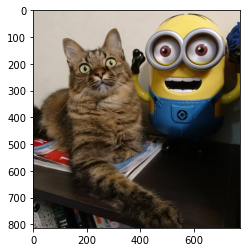

In [5]:
import skimage.io as skio
img1 = skio.imread('data/examples/example.jpg')
plt.imshow(img1)
plt.show()

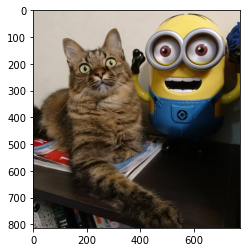

In [6]:
from PIL import Image
img2 = Image.open('data/examples/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

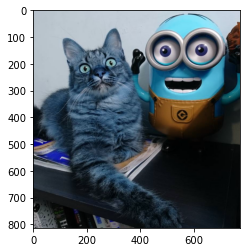

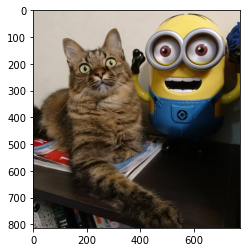

In [7]:
import cv2
img3 = cv2.imread('data/examples/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [8]:
N_times = 1000

In [9]:
%%timeit
im = np.array([skio.imread('data/examples/example.jpg') for _ in range(N_times)])

9.01 s ± 380 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
im = np.array([np.array(Image.open('data/examples/example.jpg')) for _ in range(N_times)])

8.44 s ± 420 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('data/examples/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

11.2 s ± 93.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 將影像存成 mat

In [12]:
import scipy.io as sio
sio.savemat(file_name='data/examples/example.mat', mdict={'img': img1})

In [13]:
mat_arr = sio.loadmat('data/examples/example.mat')
print(mat_arr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'img'])


In [14]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


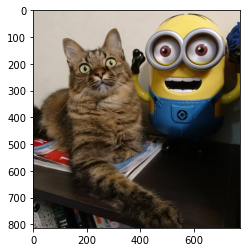

In [15]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [39]:
import pandas as pd

data = []
with open("data/examples/example.txt", 'rb',) as f:
    for line in f:
        line = line.decode().strip().replace('\t',',').split(",")
        data.append(line)
data

[['n00015388_157',
  'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'],
 ['n00015388_238',
  'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'],
 ['n00015388_304',
  'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'],
 ['n00015388_327',
  'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'],
 ['n00015388_355',
  'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
 ['n00015388_373', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg'],
 ['n00015388_379',
  'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg'],
 ['n00015388_388',
  'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg'],
 ['n00015388_442',
  'http://www.porschemania.it/discus/messages/815/102099.jpg'],
 ['n00015388_474',
  'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg'],
 ['n00015388_514',
  'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jp

In [45]:
txt = []
for i in data[:5]:
    txt.append(i[1])
txt

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

In [48]:
import requests as req
from PIL import Image
from io import BytesIO
for i in txt:
    response = req.get(i)
    image = Image.open(BytesIO(response.content))
    image.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000025582E608E8>

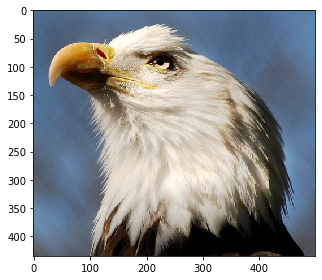

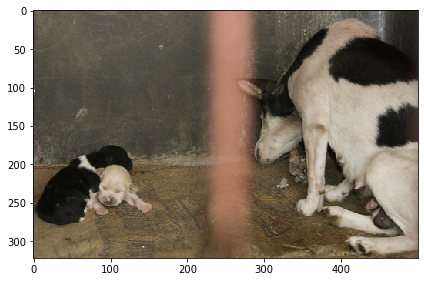

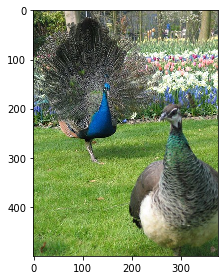

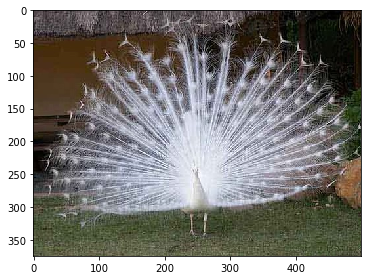

HTTPError: HTTP Error 404: Not Found

In [49]:
from skimage import io
for i in txt:
    image = io.imread(i)
    io.imshow(image)
    io.show()